# Linear Models

Consideriamo un certo numero di features $\vec{x}$ e un target $y$. Supponiamo di avere un certo dataset $\vec{x_I},y_I$. Supponiamo di avere un modello:
$y=f(\vec{x},\vec{\omega})$.

$\hat{y}_{nonpoly}=3+sin(x)-cos(x) $  
$\hat{y}_{poly}=\vec{\omega} \cdot \vec{Z}$  
  
  $\mathbf{\omega} = \begin{bmatrix} 2\\ 1 \\ \frac{1}{2} \\-\frac{1}{6} \\- \frac{1}{24} \end{bmatrix} $
  $\mathbf{Z} = \begin{bmatrix} 1\\ x \\ x^2 \\ x^3 \\ x^4 \end{bmatrix} $


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

#train:  equazioni normali

def train(X,y):
    w_fit=np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.dot(np.transpose(X),y))
    return w_fit

# mean square error likelihood
def MSE(y_true,y_pred):
    
    return np.mean((y_true-y_pred)**2)

In [2]:
x=np.arange(-3,3.5,0.5) 


Data generating model. Chiamiamo true model o data generating model il modello ipoteticamente sconosciuto che genera il dataset. In questo momento stiamo quindi generando i dataset di partenza

In [3]:
def generate_data_poly(x):
    
    w_poly=np.array([2,1,1/2,-1/6,-1/24])
    Z_poly=np.array([np.ones(len(x)),x,x**2,x**3,x**4])
    y_poly=np.dot(w_poly,Z_poly)
    
    data=np.column_stack((x,y_poly))
    return data

In [4]:
def f_poly(x):
    return 2+x+(1/2)*x**2-(1/6)*x**3-(1/24)*x**4
def f_nonpoly(x):
    return 3+np.sin(x)-np.cos(x)


In [5]:
def generate_data_nonpoly(x):

    w_nonpoly=np.array([3,1,-1])
    Z_nonpoly=np.array([np.ones(len(x)),np.sin(x),np.cos(x)])
    y_nonpoly=np.dot(w_nonpoly,Z_nonpoly)
    
    data=np.column_stack((x,y_nonpoly))
    return data

In [6]:
data1={'x':generate_data_nonpoly(x)[:,0],'y_poly':generate_data_poly(x)[:,1]}
table1= pd.DataFrame(data1)
data2={'x':generate_data_nonpoly(x)[:,0],'y_nonpoly':generate_data_nonpoly(x)[:,1]}
table2= pd.DataFrame(data2)
display(table1,table2)

,x,y_poly
0,-3.0,4.625000
1,-2.5,3.601562
2,-2.0,2.666667
3,-1.5,1.976562
4,-1.0,1.625000
5,-0.5,1.643229
6,0.0,2.000000
7,0.5,2.601562
8,1.0,3.291667
9,1.5,3.851562


,x,y_nonpoly
0,-3.0,3.848872
1,-2.5,3.202671
2,-2.0,2.506849
3,-1.5,1.931768
4,-1.0,1.618227
5,-0.5,1.642992
6,0.0,2.000000
7,0.5,2.601843
8,1.0,3.301169
9,1.5,3.926758


Deterministic model: fittiamo il dataset di dati generati con il polinomio di quarto grado con un modello polinomiale con grado sempre maggiore 

In [7]:
def Y_d(x, d):
    # Numero di righe nella matrice è la dimensione di x
    num_righe = len(x)
    # Creare un vettore di esponenti da 0 a d
    esponenti = np.arange(d + 1)
    # Espandere il vettore x in una matrice di dimensione num_righe * (d + 1)
    matrice_x = np.tile(x, (d + 1, 1)).T
    # Calcolare le potenze di x per ciascun esponente
    potenze = np.power(matrice_x, esponenti)
    return potenze



In [47]:
def poly_model_analysis(dataset,hyper_d,true_model):

    train_set=dataset[::2,:]
    validation_set=dataset[1::2,:]
    y=train_set[:,1]
    x=train_set[:,0]

    #print(dataset
    
    
    if true_model=='poly':
        g=f_poly
    if true_model=='nonpoly':
        g=f_nonpoly
   
    fig, ax = plt.subplots(2,4,figsize=(30, 10))
    x_plot=np.linspace(-3,3,100)
    for axs in ax.flatten():
        axs.plot(x_plot,g(x_plot),color='green')
        axs.scatter(dataset[:,0],dataset[:,1],color='green')
        
        axs.scatter(train_set[:,0],train_set[:,1],color='black')
        axs.scatter(validation_set[:,0],validation_set[:,1],color='red')

    
    
    for d in range(hyper_d):
        
        design_mat=Y_d(x,d)
        w_pred=train(design_mat,y)
        y_pred=np.inner(w_pred,design_mat)
        MSE_train=MSE(y_pred,y)

        validation_mat=Y_d(validation_set[:,0],d)
        MSE_val=MSE(validation_set[:,1],np.inner(w_pred,validation_mat))

        print('polynomial degree=',d ,'  MSE_train:',round(MSE_train,2), '  MSE_validation',round(MSE_val,2))
        

        
        x_plot=np.linspace(-3,3,100)
        Z_d=Y_d(x_plot,d)
        y_pred_plot=np.inner(w_pred,Z_d)
        ax.flatten()[d].plot(x_plot,y_pred_plot,color='black',)
        ax.flatten()[d].text(-3, 5, 'Polymial degree'+' '+str(d)+' ',fontsize=20)
        ax.flatten()[d].text(0.95, 0.05, 'MSE_train='+str(MSE_train)+'\n MSE_val='+str(MSE_val), horizontalalignment='right',
         verticalalignment='bottom', transform=plt.gca().transAxes,
         bbox=dict(facecolor='green', alpha=0.5))
    
        #print(dataset)
 
       

polynomial degree= 0   MSE_train: 1.2   MSE_validation 0.69
polynomial degree= 1   MSE_train: 1.09   MSE_validation 0.93
polynomial degree= 2   MSE_train: 0.97   MSE_validation 0.73
polynomial degree= 3   MSE_train: 0.11   MSE_validation 0.12
polynomial degree= 4   MSE_train: 0.0   MSE_validation 0.0
polynomial degree= 5   MSE_train: 0.0   MSE_validation 0.0
polynomial degree= 6   MSE_train: 0.0   MSE_validation 0.0


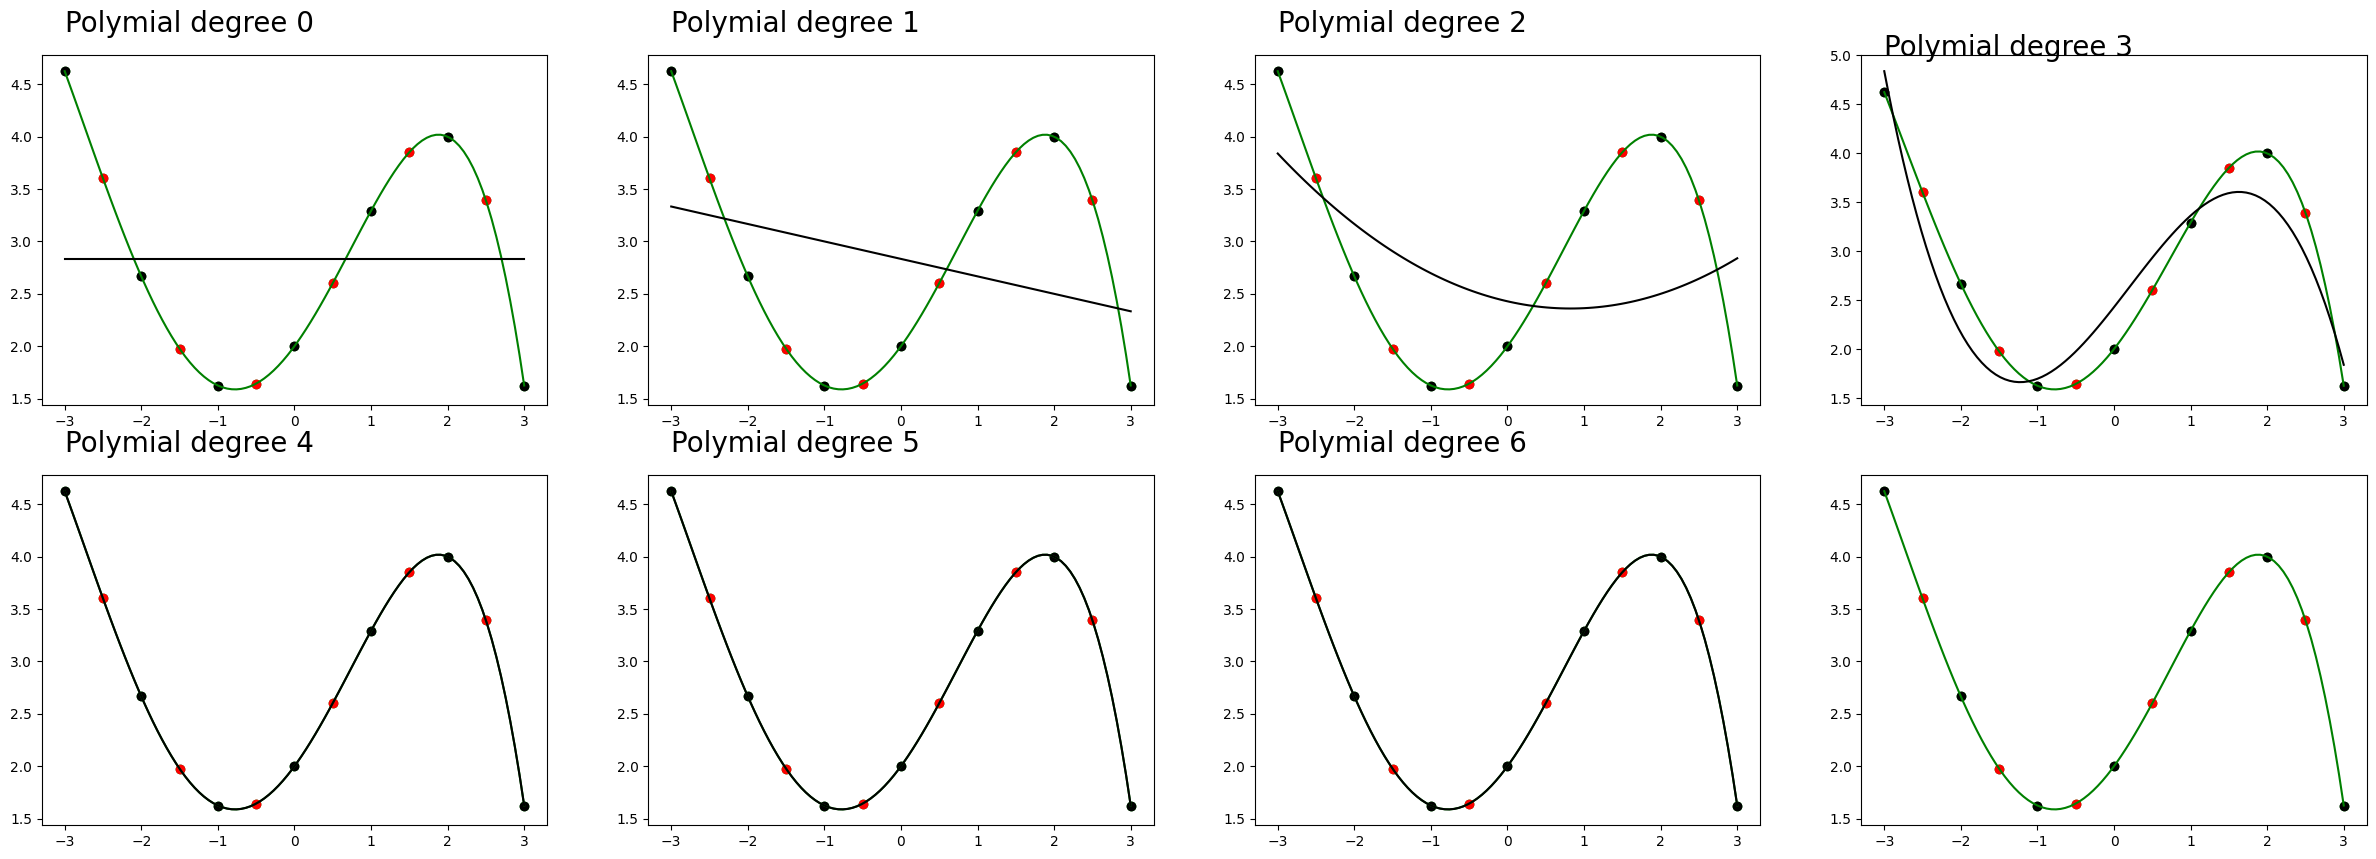

In [48]:

dataset_poly=generate_data_poly(x)
poly_model_analysis(dataset_poly,7,'poly')


polynomial degree= 0   MSE_train: 0.99   MSE_validation 1.02
polynomial degree= 1   MSE_train: 0.8   MSE_validation 0.69
polynomial degree= 2   MSE_train: 0.3   MSE_validation 0.24
polynomial degree= 3   MSE_train: 0.05   MSE_validation 0.05
polynomial degree= 4   MSE_train: 0.0   MSE_validation 0.01
polynomial degree= 5   MSE_train: 0.0   MSE_validation 0.0
polynomial degree= 6   MSE_train: 0.0   MSE_validation 0.0


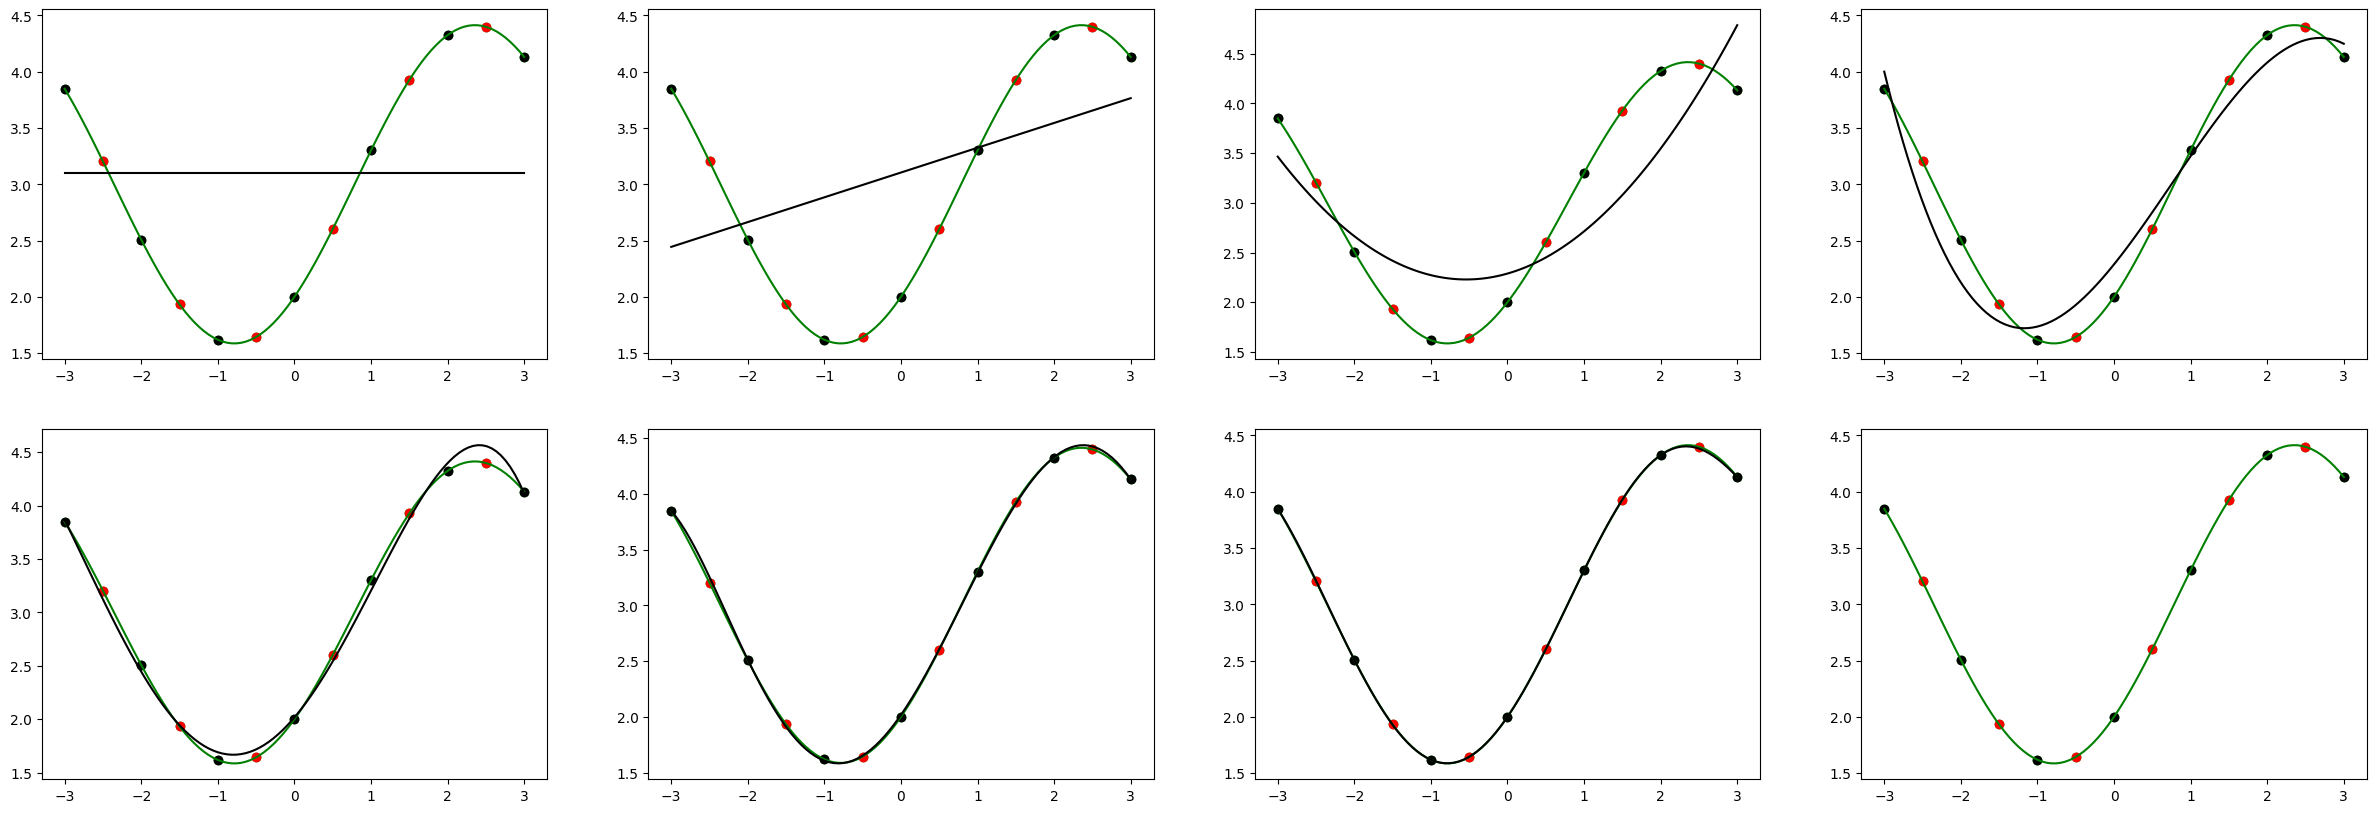

In [10]:
dataset_nonpoly=generate_data_nonpoly(x)
poly_model_analysis(dataset_nonpoly,7,'nonpoly')

## Probabilistic model

polynomial degree= 0   MSE_train: 3.5   MSE_validation 2.36
polynomial degree= 1   MSE_train: 2.05   MSE_validation 5.03
polynomial degree= 2   MSE_train: 1.94   MSE_validation 4.72
polynomial degree= 3   MSE_train: 1.25   MSE_validation 3.39
polynomial degree= 4   MSE_train: 0.76   MSE_validation 3.06
polynomial degree= 5   MSE_train: 0.63   MSE_validation 1.9
polynomial degree= 6   MSE_train: 0.0   MSE_validation 5.95


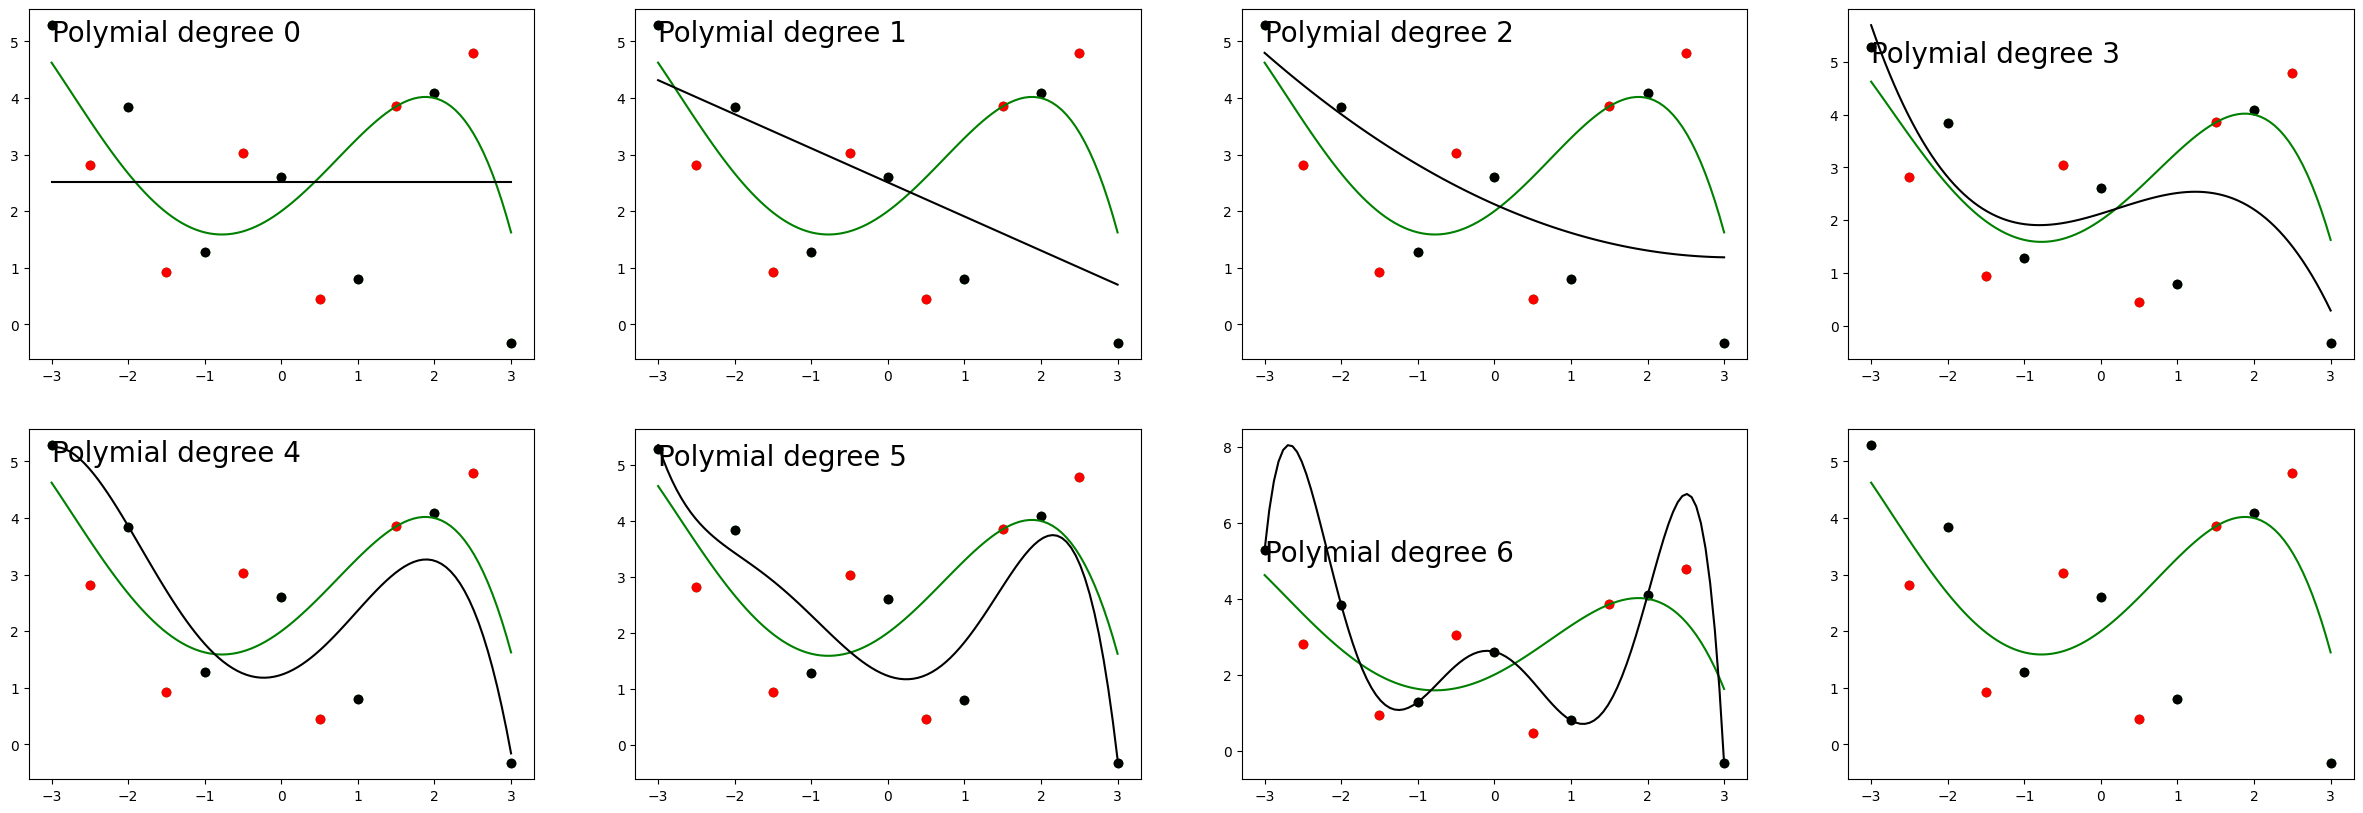

In [49]:

dataset_poly_2=np.copy(dataset_poly)
noise=np.random.normal(0,1,dataset_poly_2.shape[0])
dataset_poly_2[:,1]=dataset_poly_2[:,1]+noise

poly_model_analysis(dataset_poly_2,7,'poly')


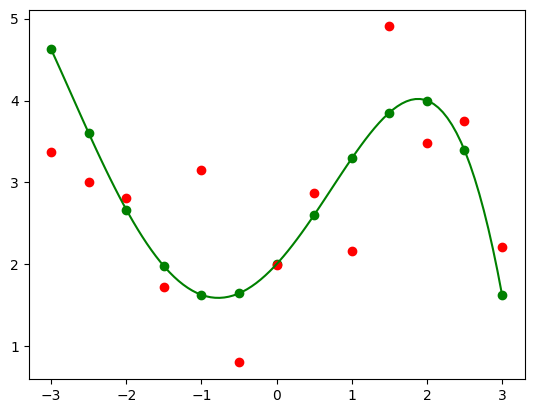

In [12]:

plt.scatter(dataset_poly[:,0],dataset_poly[:,1],color='green')
plt.scatter(dataset_poly_2[:,0],dataset_poly_2[:,1],color='red')
lin=np.linspace(-3,3,100)
plt.plot(lin,f_poly(lin),color='green')



polynomial degree= 0   MSE_train: 1.14   MSE_validation 2.73
polynomial degree= 1   MSE_train: 0.84   MSE_validation 1.95
polynomial degree= 2   MSE_train: 0.73   MSE_validation 1.48
polynomial degree= 3   MSE_train: 0.03   MSE_validation 0.87
polynomial degree= 4   MSE_train: 0.03   MSE_validation 0.93
polynomial degree= 5   MSE_train: 0.01   MSE_validation 0.97
polynomial degree= 6   MSE_train: 0.0   MSE_validation 0.66
polynomial degree= 7   MSE_train: 0.04   MSE_validation 0.67


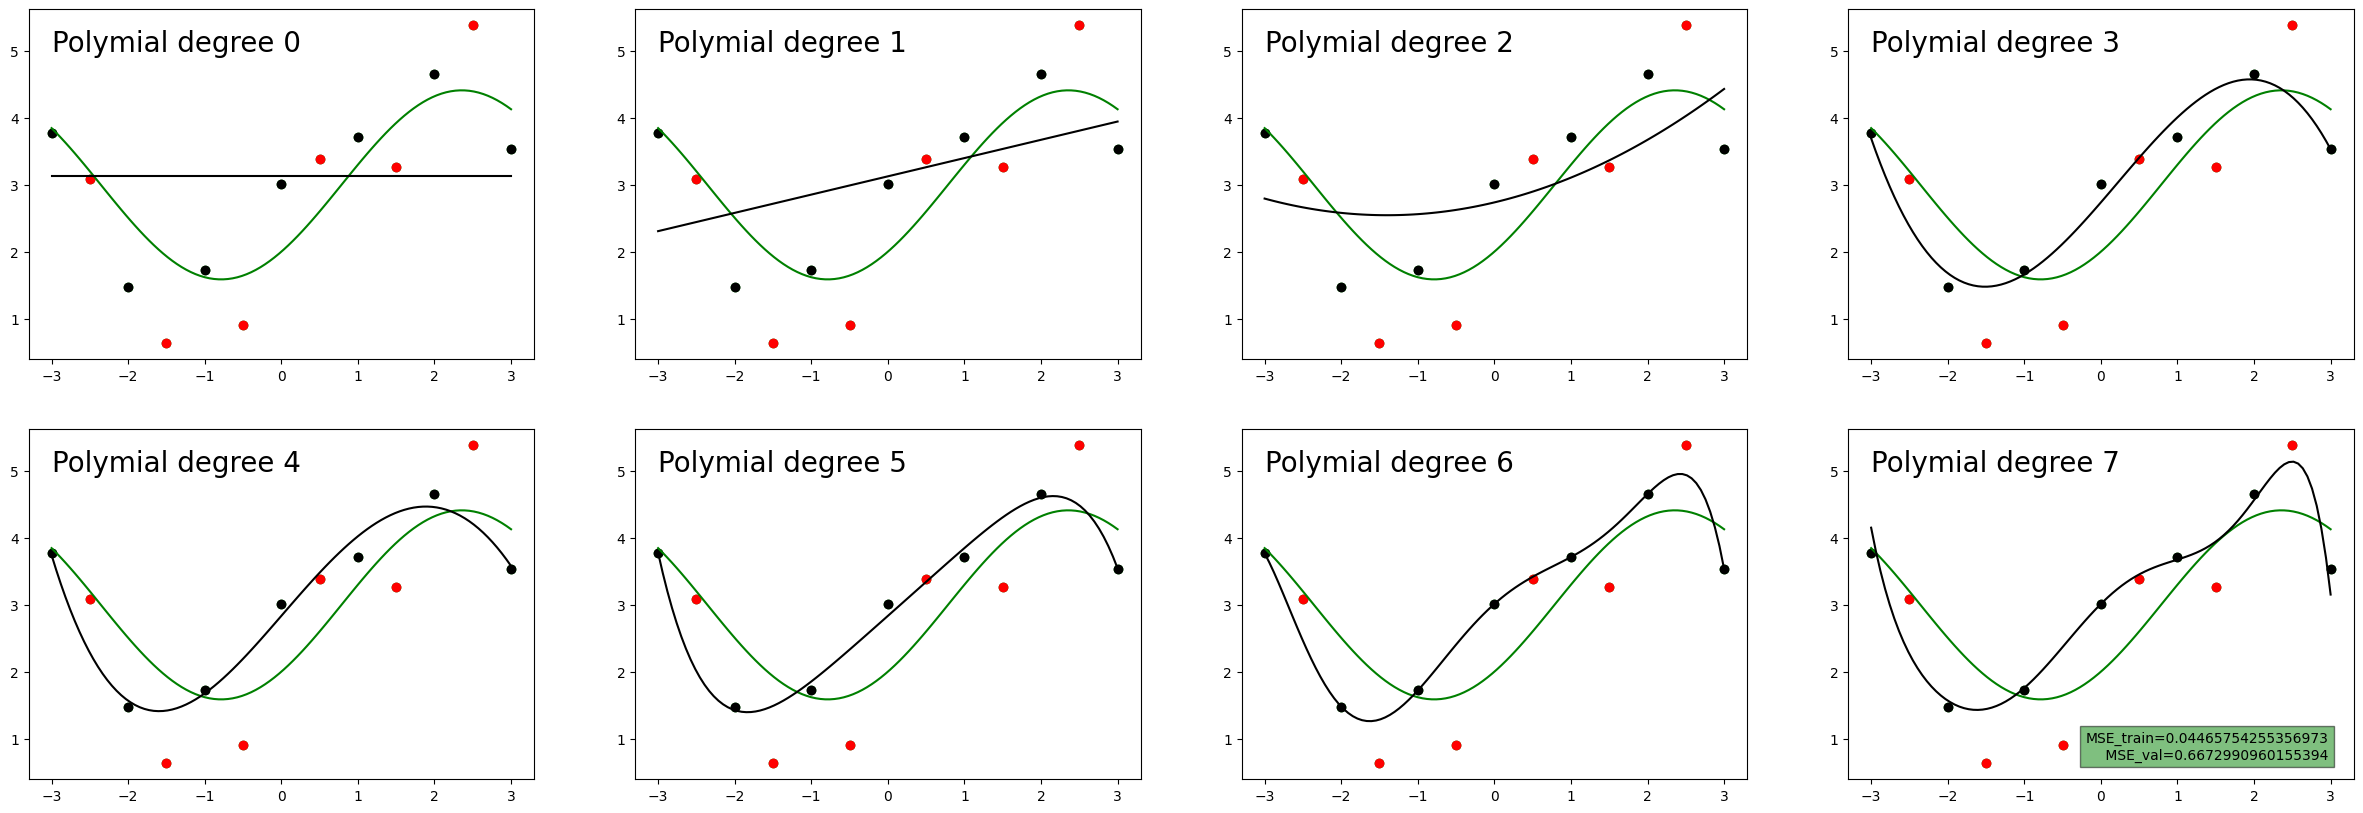

In [50]:

dataset_nonpoly_2=np.copy(dataset_nonpoly)
noise=np.random.normal(0,1,dataset_nonpoly_2.shape[0])
dataset_nonpoly_2[:,1]=dataset_nonpoly_2[:,1]+noise


poly_model_analysis(dataset_nonpoly_2,8,'nonpoly')

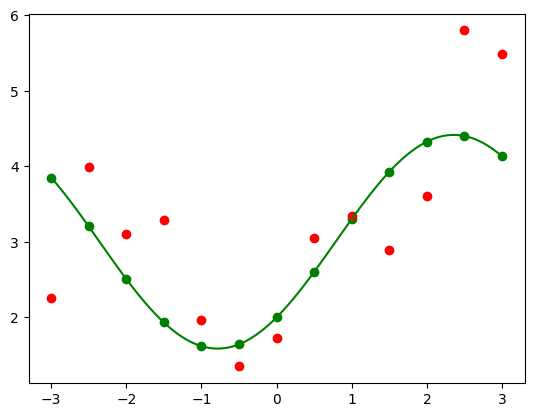

In [14]:

plt.scatter(dataset_nonpoly[:,0],dataset_nonpoly[:,1],color='green')
plt.scatter(dataset_nonpoly_2[:,0],dataset_nonpoly_2[:,1],color='red')
lin=np.linspace(-3,3,100)
plt.plot(lin,f_nonpoly(lin),color='green')
